1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [81]:
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from scipy import stats
from scipy import optimize

In [11]:
lambd= 6.3

result = 1 - sum([(math.exp(-lambd)*(lambd**k))/math.factorial(k) for k in range(0,15)])
print(result)

# We a significance level of 0.022 and since the calculated probability of 15 or more hurricanes in a year is 
# less than the significance level, 0.0022 < 0.022, it can be concluded that the number of hurricanes is 
# statistically significantly larger than the average number. 


0.002217122790073356


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [19]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre)

mean_pre = np.mean(pre)
mean_post = np.mean(post)

var_pre = np.var(pre)
var_post = np.var(post)

std = np.sqrt((var_pre + var_post)/2)

T = (mean_pre - mean_post)/(std*np.sqrt(2/n))
print("T = ", T)


pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

# Null-hypothesis: Change in blood pressure is not significantly different.
# Having a significance level of alpha = 0.05 the Student's T test would suggest that the null-hypothesis should be
# rejected and the alternative hypothesis should be accepted, stating that the change in blood pressure is 
# significantly different. 

T =  -3.991846326292112
p-value = 0.0031489409354536393


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

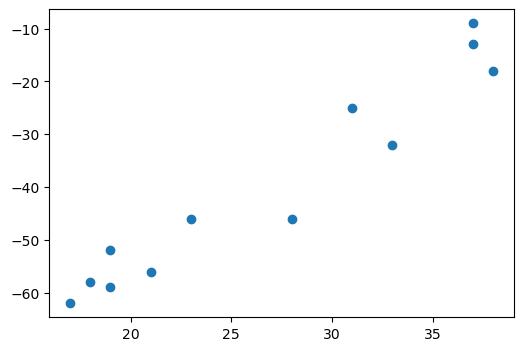

In [25]:
maxx = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
minn = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])


plt.figure(figsize=(6, 4))
plt.scatter(maxx, minn)

In [26]:
# Choosing linear regression as function to fit data

def f(x, a, b):
    return a*x + b

popt, pcov = optimize.curve_fit(f, maxx, minn, p0=[-10, 0], full_output=False)
print("parameters:\n", popt)
print()
print("covariance matrix:\n", pcov)
print()
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))

parameters:
 [   2.28123936 -100.68981951]

covariance matrix:
 [[ 0.0383508  -1.02588387]
 [-1.02588387 29.788983  ]]

a = 2.28 +- 0.20
b = -100.69 +- 5.46


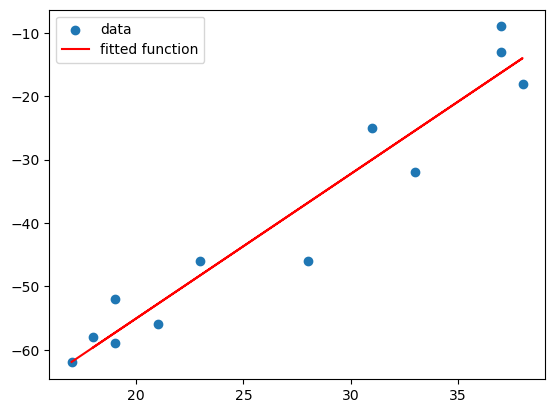

In [27]:
plt.scatter(maxx, minn, label='data')
plt.plot(maxx, f(maxx, popt[0], popt[1]), color='red', label='fitted function')
plt.legend(loc='best')

In [ ]:
# The plot above shows that the linear regression was a reasonable fit for the function, since it captures the
# tendency of the data point as well as the trend. 

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

In [95]:
file_path = 'data/residuals_261.pkl'
file = open(file_path, 'rb')
df = pickle.load(file)
file.close()

In [96]:
nested = df.item()

In [97]:
residuals = nested['residuals']
distances = nested['distances']

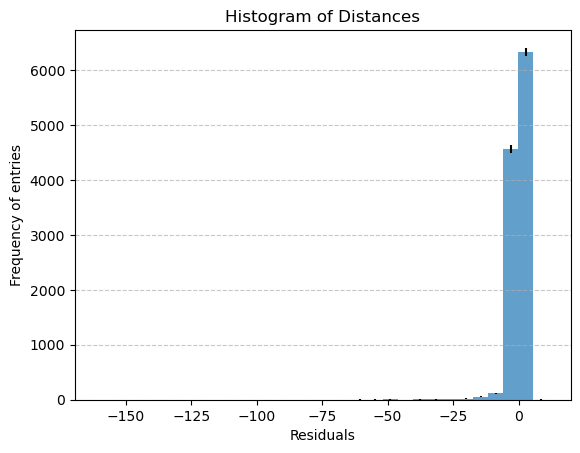

In [109]:
histogram, bins = np.histogram(residuals, bins=30)
bins_centered = (bins[:-1] + bins[1:]) / 2
width = bins[1] - bins[0]
poisson_errors = np.sqrt(histogram)

plt.bar(bins_centered, histogram, width = width, yerr=poisson_errors, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency of entries')
plt.title('Histogram of Distances')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# fit model
#perform chi square test


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [30]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

--2023-12-21 14:14:02--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-12-21 14:14:03--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb46a79466061bb4fa064a3cff1.dl.dropboxusercontent.com/cd/0/inline/CJ1QI0C41Rcn6IcYC1u4Hy24nFV7fm-2qZx1onsX8JtX7-WdmyHaiK1caYiHgHoaWKk7qDAkoiSVboRnhBBl7miPotVrqb03PZelo6vDwVL8DdZFU9_4dk1JDGBuij4oFO4/file# [following]
--2023-12-21 14:14:03--  https://ucb46a79466061bb4fa064a3cff1.dl.dropboxusercontent.com/cd/0/inline/CJ1QI0C41Rcn6IcYC1u4Hy24nFV7fm-2qZx1onsX8JtX7-Wdmy

In [65]:
file_name = "munich_temperatures_average_with_bad_data.txt"
data = pd.read_csv(file_name, header = None, sep = ' ')

matrix = data.to_numpy()
temp = matrix[4748:6560,1]
days = matrix[4748:6560,0]

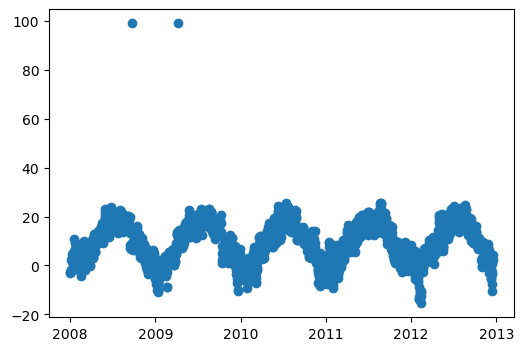

In [66]:
plt.figure(figsize=(6, 4))
plt.scatter(days, temp)

In [69]:
def f(t, a, b, c):
    return a * np.cos(2*np.pi*t + b) + c

popt, pcov = optimize.curve_fit(f, days, temp, p0=[-10, 1, 5], full_output=False)
#print("parameters:\n", popt)
#print("covariance matrix:\n", pcov)

print("The best fit values for the parameters a, b and c are given below with their uncertainties:")
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))

The best fit values for the parameters a, b and c are given below with their uncertainties:
a = -10.09 +- 0.16
b = -0.24 +- 0.02
c = 9.32 +- 0.11


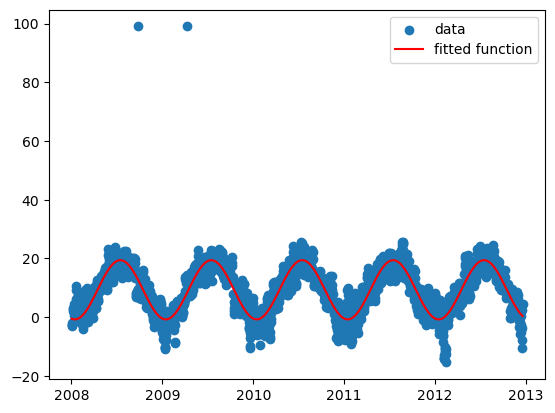

In [68]:
plt.scatter(days, temp, label='data')
plt.plot(days, f(days, popt[0], popt[1], popt[2]), color='red', label='fitted function')
plt.legend(loc='best')

In [74]:
print("The overall average temperature in Munich is", round(np.mean(matrix[:,1]), 2), "degrees.")

The overall average temperature in Munich is 8.94 degrees.


In [79]:
coldest = f(0, *popt)
hottest = f(0.5, *popt)

print("The typical daily average values predicted by the model for the coldest time of year is", round(coldest,2), "degrees.")
print("The typical daily average values predicted by the model for the hottest time of year is", round(hottest,2), "degrees.")

The typical daily average values predicted by the model for the coldest time of year is -0.49 degrees.
The typical daily average values predicted by the model for the hottest time of year is 19.12 degrees.


In [ ]:
# The b parameter in the model represents the phase shift of the cosine function.
# Relating this to temperatures, it is the time of year when the temperature is at its peak.